## EDA of Clean EEG data
By: Shateesh Bhugwansing

This notebook shows some initial EDA with with clean EEG data, provided by Timothy Ellmore's lab at CCNY. 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams.update({'font.size': 12})


import mne 

path = "/Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run1-epo.fif"
epo_1 = mne.read_epochs(path, preload=True);

# According to Ning, we can ignore the warnings. I'll ask him what they are when I meet with him next. 

Reading /Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


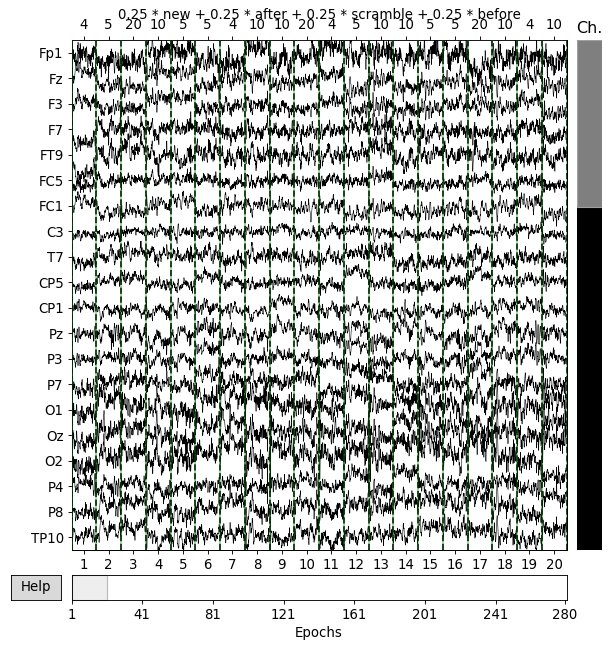

In [3]:
epo_1.plot();

In [4]:
epo_1.info

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 61 items (EEG: 61)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2017-08-23 20:21:35 GMT
    meas_id : dict | 4 items
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | Average EEG reference: on
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout :

In [5]:
print(epo_1.ch_names)
print("\n\n")
print("epo_1 data shape: ", epo_1._data.shape)

[u'Fp1', u'Fz', u'F3', u'F7', u'FT9', u'FC5', u'FC1', u'C3', u'T7', u'CP5', u'CP1', u'Pz', u'P3', u'P7', u'O1', u'Oz', u'O2', u'P4', u'P8', u'TP10', u'CP6', u'CP2', u'Cz', u'C4', u'T8', u'FT10', u'FC6', u'FC2', u'F4', u'F8', u'Fp2', u'AF7', u'AF3', u'AFz', u'F1', u'F5', u'FT7', u'FC3', u'FCz', u'C1', u'C5', u'TP7', u'CP3', u'P1', u'P5', u'PO7', u'PO3', u'POz', u'PO4', u'PO8', u'P6', u'P2', u'CPz', u'CP4', u'TP8', u'C6', u'C2', u'FC4', u'FT8', u'F6', u'F2']



('epo_1 data shape: ', (280, 61, 1401))


### Exploring one channel

(61, 1401)


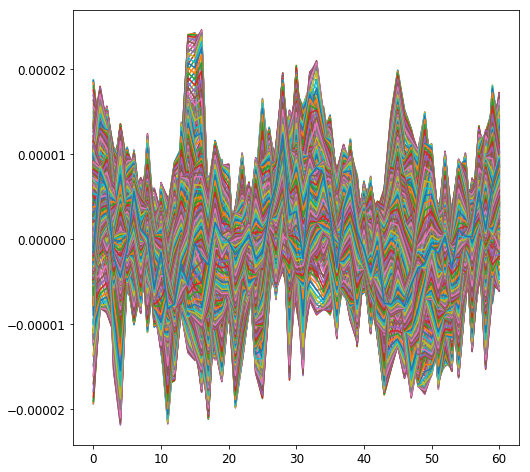

In [6]:
f7 = epo_1._data[3]
print(f7.shape)
plt.plot(f7);

In [7]:
print("\n event_id \n")
print(epo_1.event_id, type(epo_1.event_id))
print("\n events \n")
print(type(epo_1.events))
print(epo_1.events)



 event_id 

({u'new': 4, u'after': 20, u'scramble': 5, u'before': 10}, <type 'dict'>)

 events 

<type 'numpy.ndarray'>
[[   6065       0       4]
 [  22649       0       5]
 [  24865       0      20]
 [  28615       0      10]
 [  32065       0       5]
 [  37498       0       5]
 [  42081       0       4]
 [  45348       0      10]
 [  49981       0      10]
 [  53481       0      20]
 [  57765       0       4]
 [  61848       0       5]
 [  64398       0      10]
 [  66082       0      10]
 [  70749       0       5]
 [  74249       0       5]
 [  76699       0      20]
 [  79749       0      10]
 [  82182       0       4]
 [  84182       0      10]
 [  87716       0       4]
 [  92149       0       5]
 [  94199       0       5]
 [  99816       0       5]
 [ 106784       0       5]
 [ 110618       0       5]
 [ 113551       0       4]
 [ 116584       0       4]
 [ 118751       0       5]
 [ 121735       0      10]
 [ 127535       0      10]
 [ 133393       0       4]
 [ 137878      

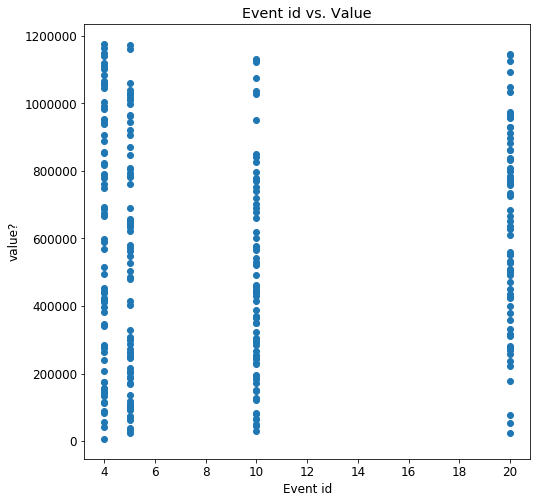

In [8]:
event_id_list = []
event_values = []


for i in range(len(epo_1.events)-1):
    event_values.append(epo_1.events[i][0])
    event_id_list.append(epo_1.events[i][2])

plt.xlabel("Event id")
plt.ylabel("value?")
plt.title("Event id vs. Value")
plt.scatter(event_id_list, event_values)    

In [35]:
print(len(epo_1_data))

280


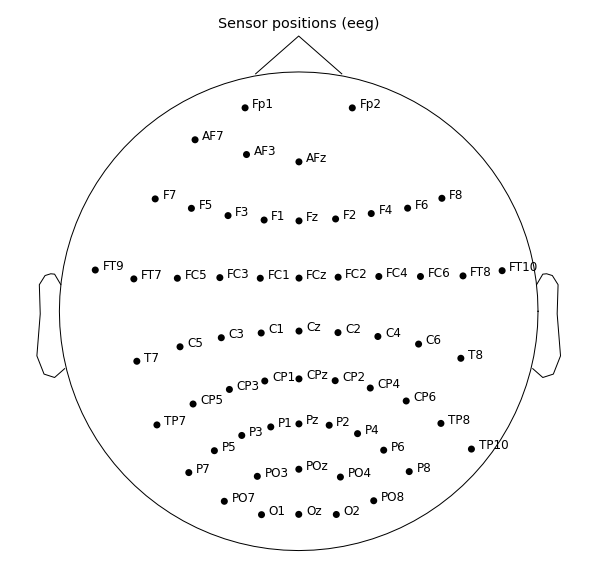

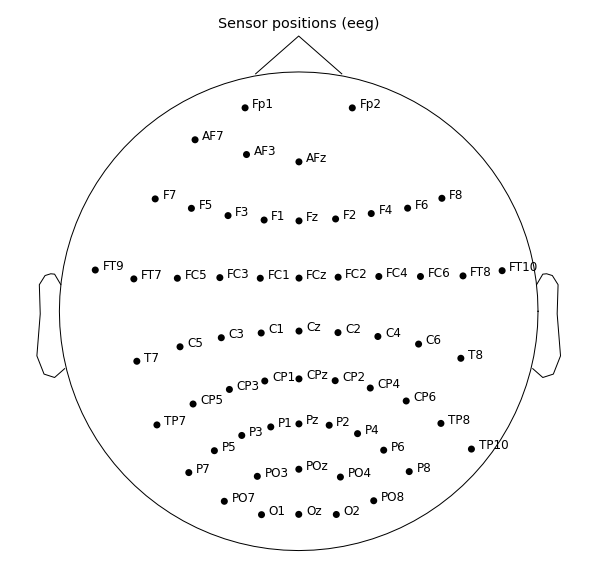

In [30]:
epo_1.plot_sensors(show_names=True)